# tf.keras

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 32
epochs = 40
lr = 0.01
train_ratio = 0.9

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
x_, y_ = digits.data, digits.target

# min-max normalization
x_ = x_ / x_.max() 

# one hot encoding
y_one_hot = np.zeros((len(y_), 10))  
y_one_hot[np.arange(len(y_)), y_] = 1

1797


In [7]:
a = np.zeros((5,5))
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
a[np.arange(1,3), 0] =1
a[2, np.arange(1,3)] =1
a

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_, 
                                                    y_one_hot, 
                                                    test_size=0.05, 
                                                    stratify=y_)

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
model = tf.keras.Sequential()
model.add(Dense(25, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax')) 

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio)

Train on 1536 samples, validate on 171 samples
Epoch 1/40
1536/1536 [==============================] - 1s 762us/step - loss: 2.1851 - acc: 0.2760 - val_loss: 2.0286 - val_acc: 0.5029
Epoch 2/40
1536/1536 [==============================] - 0s 57us/step - loss: 1.8691 - acc: 0.6270 - val_loss: 1.6893 - val_acc: 0.7602
Epoch 3/40
1536/1536 [==============================] - 0s 57us/step - loss: 1.5080 - acc: 0.7806 - val_loss: 1.3402 - val_acc: 0.8363
Epoch 4/40
1536/1536 [==============================] - 0s 57us/step - loss: 1.1644 - acc: 0.8652 - val_loss: 1.0294 - val_acc: 0.9006
Epoch 5/40
1536/1536 [==============================] - 0s 55us/step - loss: 0.8822 - acc: 0.8952 - val_loss: 0.7830 - val_acc: 0.9181
Epoch 6/40
1536/1536 [==============================] - 0s 55us/step - loss: 0.6808 - acc: 0.9134 - val_loss: 0.6163 - val_acc: 0.9357
Epoch 7/40
1536/1536 [==============================] - 0s 56us/step - loss: 0.5507 - acc: 0.9225 - val_loss: 0.5145 - val_acc: 0.9357
Epoch 8

In [16]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

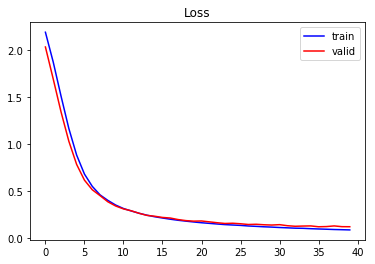

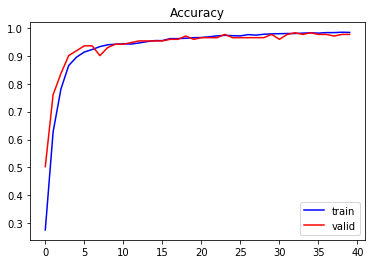

In [17]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

In [23]:
y_predict = model.predict_classes(x_test)
print(y_test[0])
y_test_label = np.argmax(y_test, axis=1)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.9888888888888889


In [ ]:
tf.global_variables()

In [ ]:
# save model
model.save('my_model.h5')

# load model
another_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
y_predict = another_model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

# Practice
Build a cat-dog-classifier with tf.keras